## Basic Imports

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import nltk.data
print("nltk paths:", nltk.data.path)


nltk paths: ['C:\\Users\\karli/nltk_data', 'c:\\Users\\karli\\anaconda3\\envs\\test\\nltk_data', 'c:\\Users\\karli\\anaconda3\\envs\\test\\share\\nltk_data', 'c:\\Users\\karli\\anaconda3\\envs\\test\\lib\\nltk_data', 'C:\\Users\\karli\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Read the CSV file
df = pd.read_csv('spam.csv')

# Display the first few rows of the DataFrame
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Rename the columns name
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#check duplicate values
df.duplicated().sum()

np.int64(403)

In [11]:
len(df)

5572

In [12]:
#remove Duplicate
df = df.drop_duplicates(keep = 'first')
len(df)

5169

## Feature Engg

In [13]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

In [14]:
# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [15]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk

ps = PorterStemmer()
RE_WORD = re.compile(r'\w+')

# try to load stopwords; fallback to small set
try:
    STOPWORDS = set(stopwords.words('english'))
except LookupError:
    STOPWORDS = {"a","an","the","in","on","at","for","and","or","is","it","to","of"}

def transform_text_safe(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    try:
        tokens = nltk.word_tokenize(text)   # prefer nltk tokenizer
    except LookupError:
        tokens = RE_WORD.findall(text)      # fallback
    tokens = [tok for tok in tokens if tok.isalnum() and tok not in STOPWORDS]
    return " ".join(ps.stem(tok) for tok in tokens)

df['transformed_text'] = df['text'].apply(transform_text_safe)


In [17]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfid = TfidfVectorizer(max_features = 500)

In [19]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

## Model Training

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [22]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

In [23]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
    
}

## Model Evaluation

In [24]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

In [25]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For:  SVC
Accuracy:  0.9671179883945842
Precision:  0.9333333333333333

For:  KNN
Accuracy:  0.9274661508704062
Precision:  1.0

For:  NB
Accuracy:  0.9709864603481625
Precision:  0.9655172413793104

For:  DT
Accuracy:  0.937137330754352
Precision:  0.9010989010989011

For:  LR
Accuracy:  0.9632495164410058
Precision:  0.9629629629629629

For:  RF
Accuracy:  0.9700193423597679
Precision:  0.9421487603305785

For:  Adaboost
Accuracy:  0.9235976789168279
Precision:  0.8734177215189873

For:  Bgc
Accuracy:  0.9622823984526112
Precision:  0.9024390243902439

For:  ETC
Accuracy:  0.9709864603481625
Precision:  0.921875

For:  GBDT
Accuracy:  0.9497098646034816
Precision:  0.93

For:  xgb
Accuracy:  0.9690522243713733
Precision:  0.9568965517241379


In [26]:
!pip install optuna

In [38]:
import optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    random_state = trial.suggest_int('random_state', 1, 100)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    max_samples = trial.suggest_float('max_samples', 0.1, 1.0)
    
    rfc = RandomForestClassifier(
        n_estimators=n_estimators,
        random_state=random_state,
        max_depth=max_depth,
        max_samples=max_samples
    )
    
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return float(accuracy)

In [39]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-11-30 19:55:11,768] A new study created in memory with name: no-name-4e065dcb-43ae-4992-b4ac-5e4dd8686466
[I 2025-11-30 19:55:12,860] Trial 0 finished with value: 0.9052224371373307 and parameters: {'n_estimators': 349, 'random_state': 22, 'max_depth': 6, 'max_samples': 0.6684889743475301}. Best is trial 0 with value: 0.9052224371373307.
[I 2025-11-30 19:55:15,892] Trial 1 finished with value: 0.9661508704061895 and parameters: {'n_estimators': 428, 'random_state': 45, 'max_depth': 20, 'max_samples': 0.9068577716058224}. Best is trial 1 with value: 0.9661508704061895.
[I 2025-11-30 19:55:16,797] Trial 2 finished with value: 0.9477756286266924 and parameters: {'n_estimators': 207, 'random_state': 75, 'max_depth': 12, 'max_samples': 0.6158109823214051}. Best is trial 1 with value: 0.9661508704061895.
[I 2025-11-30 19:55:18,275] Trial 3 finished with value: 0.9235976789168279 and parameters: {'n_estimators': 403, 'random_state': 66, 'max_depth': 8, 'max_samples': 0.713774385576798

In [40]:
print(f'best trail ,{study.best_trial.value}')
print(f"best paramter,{study.best_params}")

best trail ,0.9671179883945842
best paramter,{'n_estimators': 154, 'random_state': 4, 'max_depth': 20, 'max_samples': 0.533413168235625}


In [41]:
model=RandomForestClassifier(**study.best_trial.params)

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print(f" accuracy of random forest {accuracy_score(y_test,y_pred)}")

 accuracy of random forest 0.9671179883945842


C:\Users\karli\AppData\Local\Temp\ipykernel_7292\2031554127.py:4: ExperimentalWarning: optuna.visualization.matplotlib._parallel_coordinate.plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.
  plot_parallel_coordinate(study)


<Axes: title={'center': 'Parallel Coordinate Plot'}>

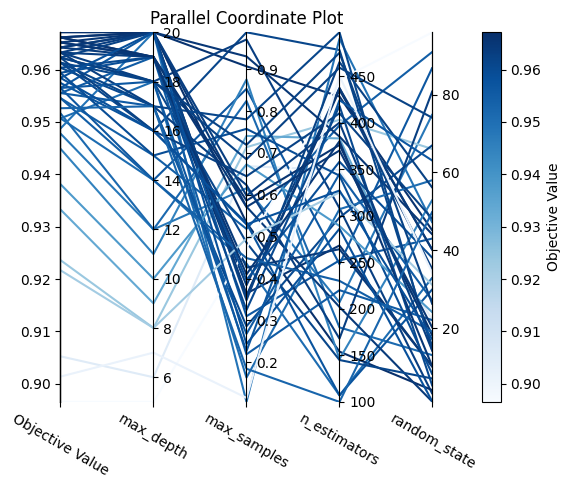

In [42]:
from optuna.visualization.matplotlib import plot_parallel_coordinate
import matplotlib.pyplot as plt

plot_parallel_coordinate(study)


C:\Users\karli\AppData\Local\Temp\ipykernel_7292\891353567.py:2: ExperimentalWarning: optuna.visualization.matplotlib._contour.plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  plot_contour(study)


array([[<Axes: xlabel='max_depth', ylabel='max_depth'>,
        <Axes: xlabel='max_samples', ylabel='max_depth'>,
        <Axes: xlabel='n_estimators', ylabel='max_depth'>,
        <Axes: xlabel='random_state', ylabel='max_depth'>],
       [<Axes: xlabel='max_depth', ylabel='max_samples'>,
        <Axes: xlabel='max_samples', ylabel='max_samples'>,
        <Axes: xlabel='n_estimators', ylabel='max_samples'>,
        <Axes: xlabel='random_state', ylabel='max_samples'>],
       [<Axes: xlabel='max_depth', ylabel='n_estimators'>,
        <Axes: xlabel='max_samples', ylabel='n_estimators'>,
        <Axes: xlabel='n_estimators', ylabel='n_estimators'>,
        <Axes: xlabel='random_state', ylabel='n_estimators'>],
       [<Axes: xlabel='max_depth', ylabel='random_state'>,
        <Axes: xlabel='max_samples', ylabel='random_state'>,
        <Axes: xlabel='n_estimators', ylabel='random_state'>,
        <Axes: xlabel='random_state', ylabel='random_state'>]],
      dtype=object)

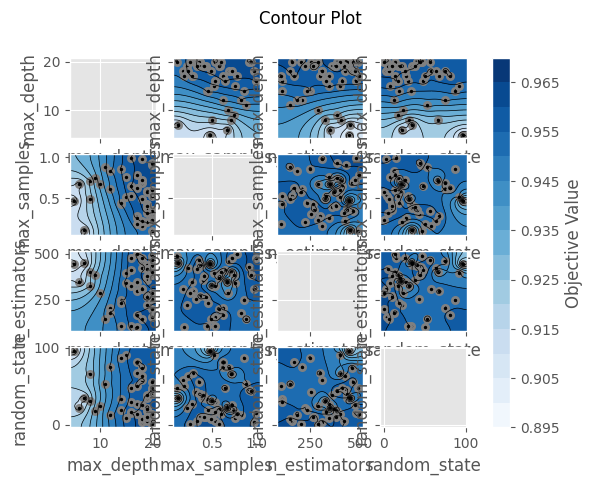

In [43]:
from optuna.visualization.matplotlib import plot_contour
plot_contour(study)

C:\Users\karli\AppData\Local\Temp\ipykernel_7292\2709716932.py:3: ExperimentalWarning: optuna.visualization.matplotlib._slice.plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  plot_slice(study)


array([<Axes: xlabel='max_depth', ylabel='Objective Value'>,
       <Axes: xlabel='max_samples'>, <Axes: xlabel='n_estimators'>,
       <Axes: xlabel='random_state'>], dtype=object)

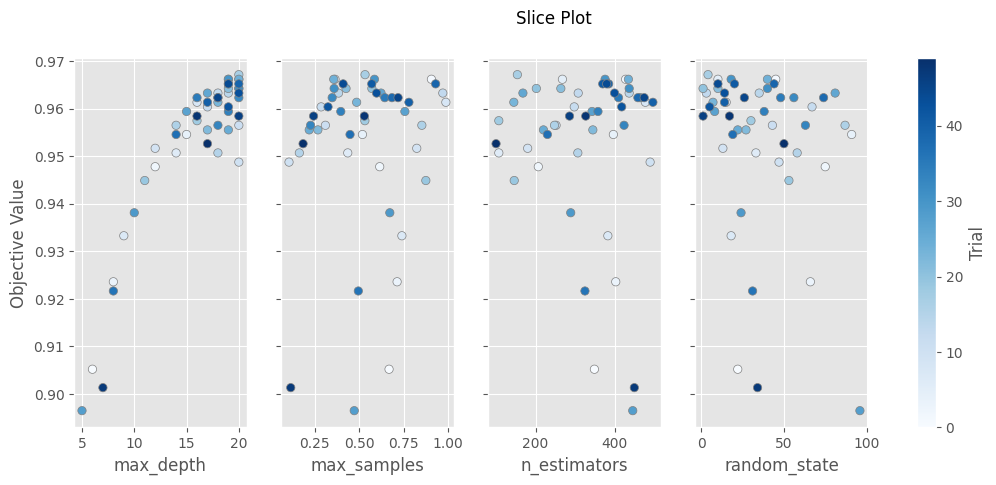

In [44]:
from optuna.visualization.matplotlib import plot_slice

plot_slice(study)

C:\Users\karli\AppData\Local\Temp\ipykernel_7292\1123701195.py:2: ExperimentalWarning: optuna.visualization.matplotlib._param_importances.plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study)


<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

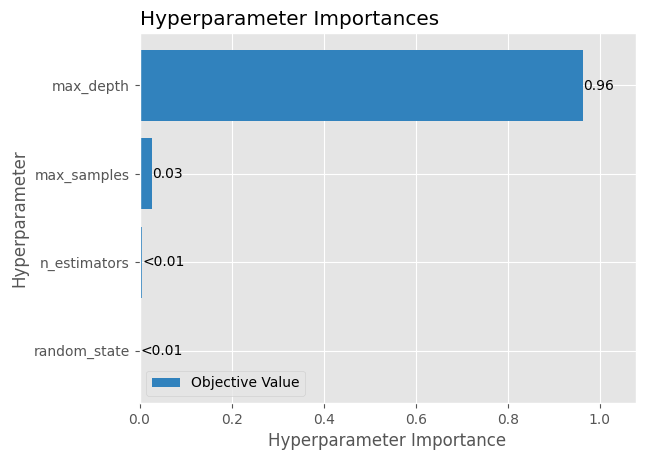

In [45]:
from optuna.visualization.matplotlib import plot_param_importances
plot_param_importances(study)

C:\Users\karli\AppData\Local\Temp\ipykernel_7292\3555999830.py:3: ExperimentalWarning: optuna.visualization.matplotlib._optimization_history.plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study)


<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

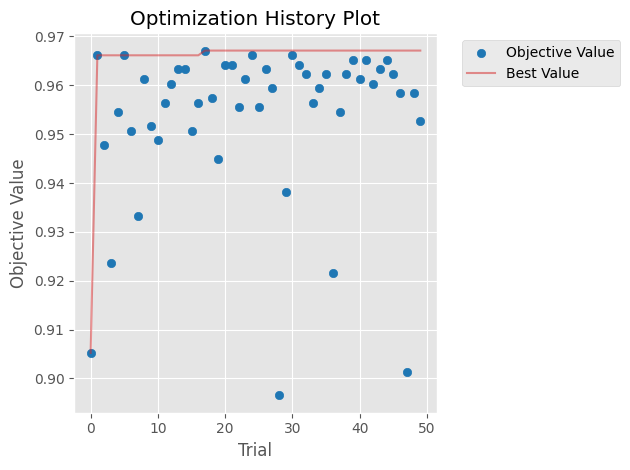

In [46]:
from optuna.visualization.matplotlib import plot_param_importances,plot_optimization_history

plot_optimization_history(study)